# KLダイバージェンスの描画

## 対象とするモデル
以下のように、平均mean2=2, 標準偏差sd2=2の正規分布を対象とする

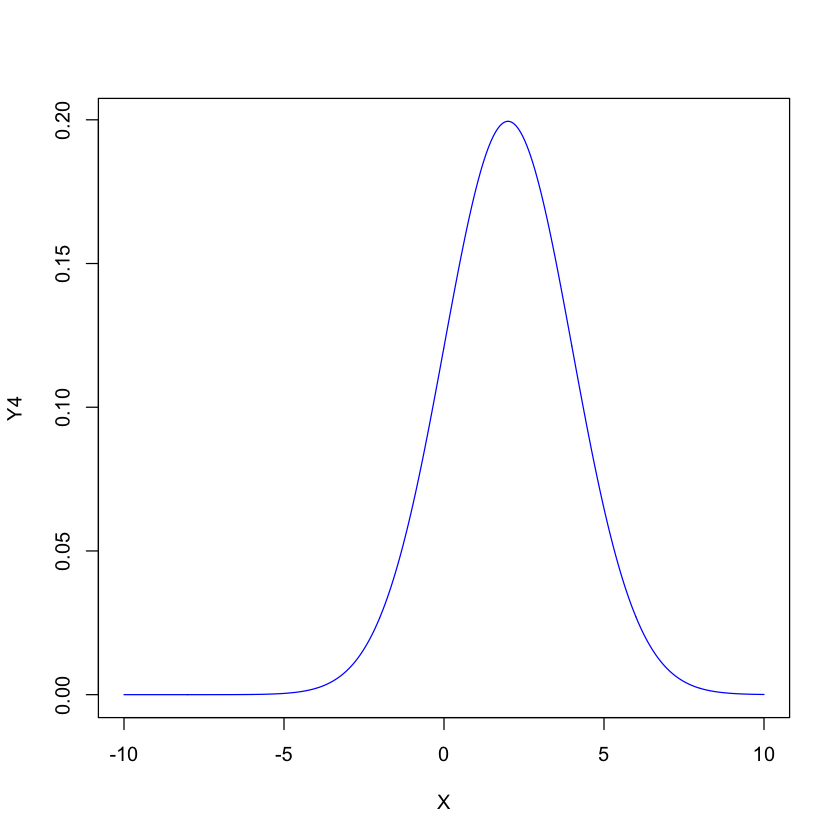

In [2]:
n = 1000
mean2 = 2
sd2 = 2

X = seq(-10, 10, length = n)
Y4 = dnorm(X, mean = mean2, sd = sd2)
plot(X,
Y4,
type = "l",
col = "blue")

## KLダイバージェンスの図示
左の図は平均値を変化させた時のKLダイバージェンスの値。平均値が対象モデルと同じ2の時にKLダイバージェンスは最小値を取ることがわかる。  
右の図は標準偏差を変化させた時のKLダイバージェンスの値。標準偏差が対象モデルと同じ2の時にKLダイバージェンスは最小値を取ることがわかる。  

これらのことから、KLダイバージェンスは、モデル間のパラメータを用いて、モデル間の距離を表していると捉えることができる。

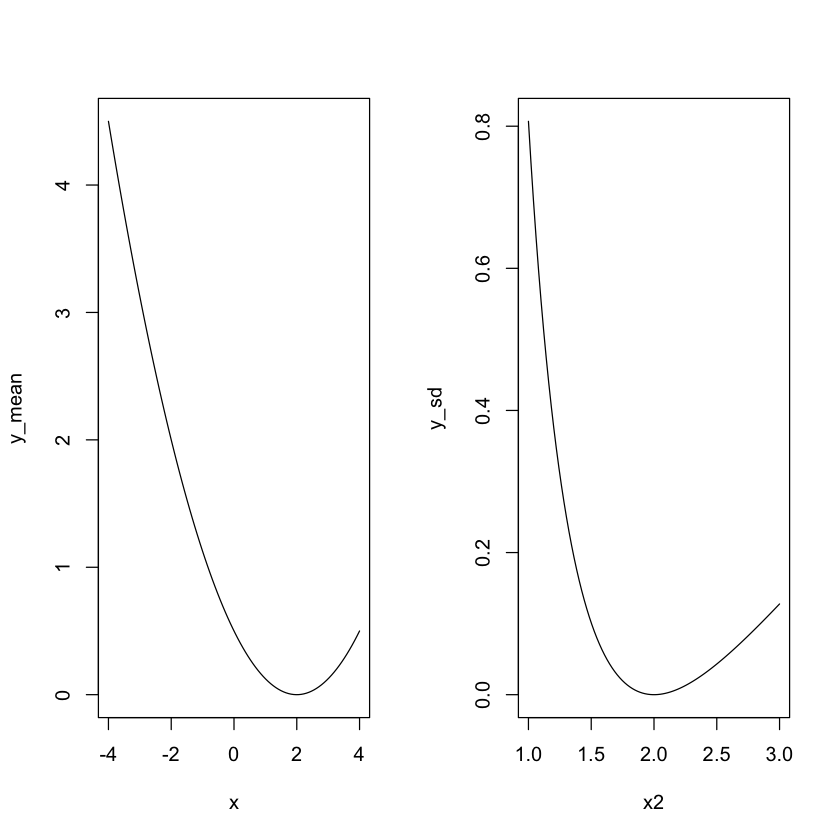

In [4]:
f_kl_divergence = function(m1, m2, sd1, sd2) {
  log(sd1 / sd2) + (sd2 ^ 2 + (m1 - m2) ^ 2) / (2 * sd1 ^ 2) - 1 / 2
}
y_mean = c()
x = seq(-4, 4, length = 100)
for (i in x) {
y_mean = append(y_mean, f_kl_divergence(i, mean2, sd2, sd2))
}

y_sd = c()
x2 = seq(1, 3, length = 100)
for (i in x2) {
   y_sd = append(y_sd, f_kl_divergence(mean2, mean2, i, sd2))
}

layout(matrix(1:2, ncol=2))
plot(x, y_mean, type="l")
plot(x2, y_sd, type="l")

## （番外編）Rのライブラリを用いてみる
Rには、KLダイバージェンスにしたがって乱数を生成し、元モデルのパラメータを推定する関数がある。  
その関数である`KL.divergence()`を用いて乱数を発生させ、それをプロットした。  
するとその結果は先ほどplotした理論値に近いグラフを描画することができた。  

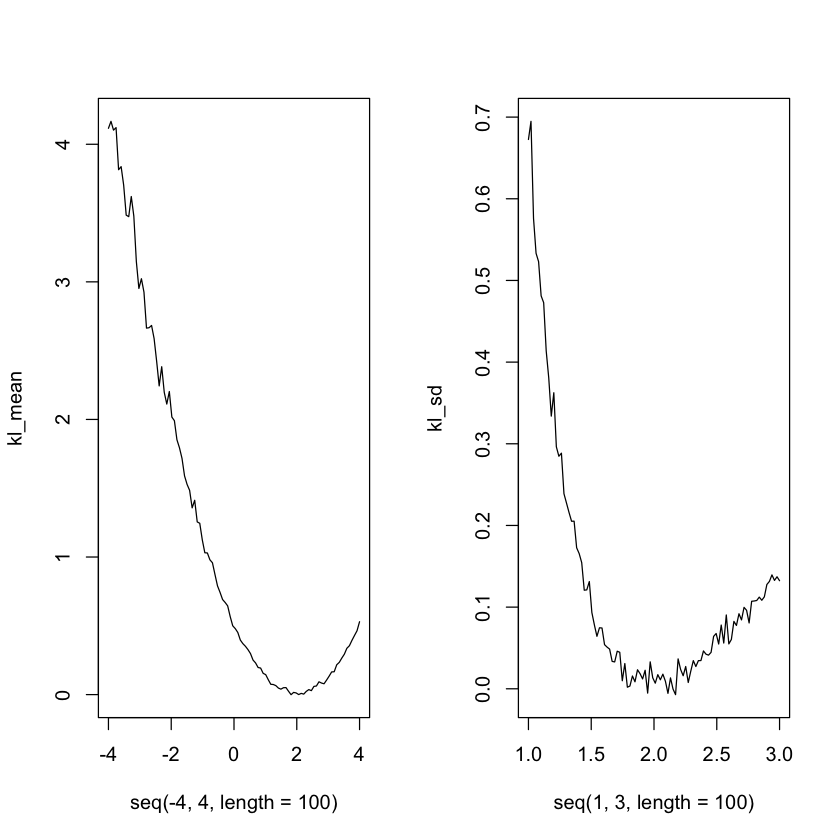

In [5]:
library(FNN)
set.seed(100)

kl_mean = c()
Y1 =  rnorm(n * 10, mean = mean2, sd = sd2)
for (i in seq(-4, 4, length = 100)) {
  Y2 = rnorm(n * 10, mean = i, sd = sd2)
  divs = KL.divergence(Y1, Y2, k = 2)
  kl_mean = append(kl_mean, mean(divs))
}

kl_sd = c()
for (i in seq(1, 3, length = 100)) {
  Y3 = rnorm(n * 10, mean = mean2, sd = i)
  divs2 = KL.divergence(Y1, Y3, k = 2)
  kl_sd = append(kl_sd, mean(divs2))
}

layout(matrix(1:2, ncol=2))
plot(seq(-4, 4, length = 100), kl_mean, type="l")
plot(seq(1, 3, length = 100), kl_sd, type="l")